In [189]:
#1D Linear Convection
#Foward Time - Backward SPace (FTBS)
#import libraries
import numpy
from matplotlib import pyplot
%matplotlib inline

In [190]:
# Parameter definitions
nx = 41 #spatial discrete point number
L = 2.0 #length of the 1D domain
dx = L / (nx - 1) # spatial grid size (nx points, nx-1 intervals)
nt = 25 # number of time steps
dt = 0.02 #time step size
c = 1.0 #convection speed

In [203]:
# Grid point coordinates defined
x = numpy.linspace(0.0, L, num = nx)

In [204]:
# Set initial conditoins with 1.0 everywhere (temporary)
u0 = numpy.ones(nx)
# Get a list of x-indices where x is between 0.5 and 1.0 (initial conditions = 2 at these points)
mask = numpy.where((x >= 0.5) & (x <= 1.0))
u0[mask] = 2.0 # redefine the initial conditions between 0.5&1.0 to 2.0

In [205]:
#validate the initial conditions are set as expected and desired
for i in range(nx):
    print(x[i], u0[i]) #machine error introduces the oddities seen below

0.0 1.0
0.05 1.0
0.1 1.0
0.15000000000000002 1.0
0.2 1.0
0.25 1.0
0.30000000000000004 1.0
0.35000000000000003 1.0
0.4 1.0
0.45 1.0
0.5 2.0
0.55 2.0
0.6000000000000001 2.0
0.65 2.0
0.7000000000000001 2.0
0.75 2.0
0.8 2.0
0.8500000000000001 2.0
0.9 2.0
0.9500000000000001 2.0
1.0 2.0
1.05 1.0
1.1 1.0
1.1500000000000001 1.0
1.2000000000000002 1.0
1.25 1.0
1.3 1.0
1.35 1.0
1.4000000000000001 1.0
1.4500000000000002 1.0
1.5 1.0
1.55 1.0
1.6 1.0
1.6500000000000001 1.0
1.7000000000000002 1.0
1.75 1.0
1.8 1.0
1.85 1.0
1.9000000000000001 1.0
1.9500000000000002 1.0
2.0 1.0


In [206]:
def plot_figure(x, u0, u): #plot initial condition and something later
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0,  linestyle='-', label='Initial Condition')
    pyplot.plot(x, u,  linestyle='-', label='Current Solution')
    pyplot.legend()
    pyplot.xlim(0.0, 2.0)
    pyplot.ylim(0.0, 2.5)

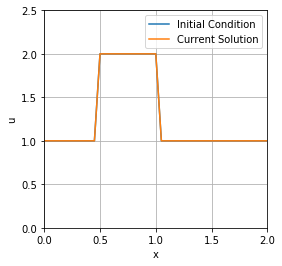

In [207]:
plot_figure(x, u0, u0)

In [208]:
u = u0.copy()
for n in range(nt):
    un = u.copy() # generate each u calculation at time steps 'n'
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

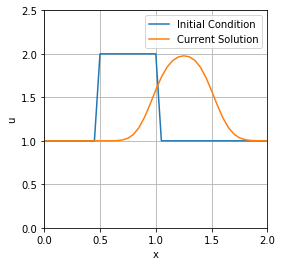

In [209]:
plot_figure(x, u0, u)

# 1D Non-Linear Convection

In [211]:
u1 = u0.copy()
for n in range(nt):
    un = u1.copy() # generate each u calculation at time steps 'n'
    for i in range(1, nx):
        u1[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1]) #non-linear 
        #solution " c -> un[i]"

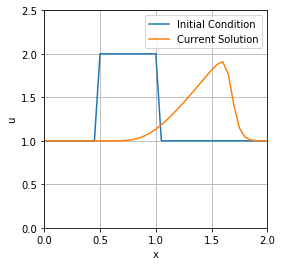

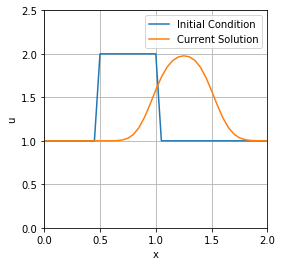

In [212]:
plot_figure(x, u0, u1) #now plotting non-linear solution
plot_figure(x, u0, u)

In [220]:
# More efficient to utilize array slicig
u2 = u0.copy()
for n in range(nt):
    u2[1:] = u2[1:] - dt / dx * u2[1:] * (u2[1:] - u2[:-1])

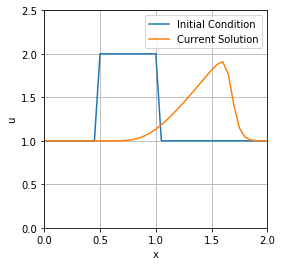

In [216]:
plot_figure(x, u0, u2)

In [221]:
# ctrl + shift + p for command mode palette